In [2]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
from scipy.stats import gaussian_kde

In [3]:
priors_dict = {
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=0.7, loc=10000, scale=60000),
    "div_time_dom": scipy.stats.lognorm(s=0.5, loc=500, scale=3000),
    "div_time_scot": scipy.stats.lognorm(s=0.3, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_rate_scot": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.6, loc=0, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1.5, loc=5000, scale=100000),
    "pop_size_scot_1": scipy.stats.lognorm(s=1, loc=0, scale=4000),
    "pop_size_eu_1": scipy.stats.lognorm(s=1.3, loc=0, scale=20000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
}


theta = []
for key, prior in priors_dict.items():
    theta.append(prior.rvs(100000))
theta = np.concatenate(theta, axis=0)
print(np.shape(theta))
theta = np.reshape(theta, (16,100000))
print(np.shape(theta))

(1600000,)
(16, 100000)


In [4]:
theta2 = pd.read_csv("./tr2_100k.csv")
theta2 = theta2.to_numpy(dtype=np.float32)
np.shape(theta2)
#theta3 = pd.read_csv("./tr3_100k.csv")
#theta3 = theta3.to_numpy(dtype=np.float32)
#np.shape(theta3)
#theta_4 = pd.read_csv("./tr4_jax_big_2.csv")
#theta_4 = theta_4.to_numpy(dtype=np.float32)
#np.shape(theta_4)

(100000, 16)

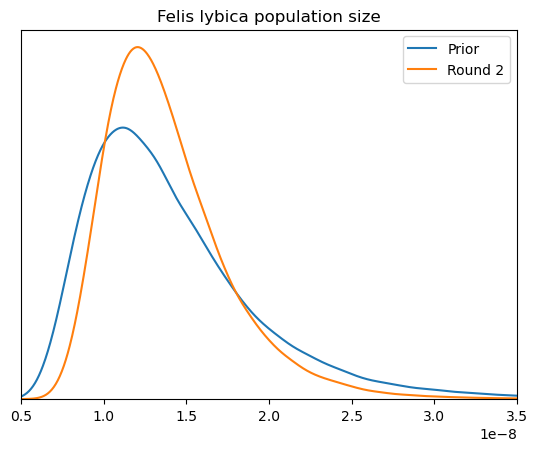

In [121]:
# Perform KDE
kde1 = gaussian_kde(theta[15][0:99999], bw_method=0.12)
kde2 = gaussian_kde(theta2[0:99999,15], bw_method=0.15)
#kde3 = gaussian_kde(theta3[0:99999,9], bw_method=0.1)
# Generate a smooth range of x-values
x1_values = np.linspace(0.5e-8, 3.5e-8, 1000)
x2_values = np.linspace(0.5e-8, 3.5e-8, 1000)
#x3_values = np.linspace(0, 40000, 1000)
# Get corresponding y-values for the KDE
y1_values = kde1(x1_values)
y2_values = kde2(x2_values)
#y3_values = kde3(x3_values)
# Plot the smooth KDE curve
plt.plot(x1_values, y1_values, label="Prior")
plt.plot(x2_values, y2_values, label="Round 2")
#plt.plot(x3_values, y3_values, label="Round 3")
# Show the plot
plt.xlim([0.5e-8, 3.5e-8])
plt.ylim(bottom=0)
plt.yticks([])
plt.title("Felis lybica population size")
plt.legend(loc='upper right')
plt.show()

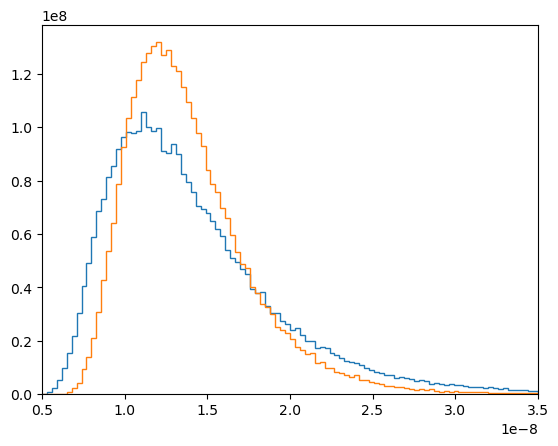

In [119]:
plt.hist(theta[15][0:99999], bins=np.arange(0.5e-8, 3.5e-8, 3e-10), density=True, histtype='step')
plt.hist(theta2[0:99999,15], bins=np.arange(0.5e-8, 3.5e-8, 3e-10), density=True, histtype='step')
#plt.hist(theta3[0:99999,9], bins=np.arange(0, 40000, 100), density=True, histtype='step')
plt.xlim([0.5e-8, 3.5e-8])
plt.show()

In [124]:
params = {
    0: {"range" : np.linspace(0, 150, 1000), "lims" : [0, 150], "bw" : [0.1, 0.1]},
    1: {"range" : np.linspace(0, 350000, 1000), "lims" : [0, 350000], "bw" : [0.1, 0.1]},
    2: {"range" : np.linspace(0, 13000, 1000), "lims" : [0, 13000], "bw" : [0.1, 0.15]},
    3: {"range" : np.linspace(0, 8000, 1000), "lims" : [0, 8000], "bw" : [0.15, 0.15]},
    4: {"range" : np.linspace(0, 0.4, 1000), "lims" : [0, 0.4], "bw" : [0.03, 0.1]},
    5: {"range" : np.linspace(0, 0.4, 1000), "lims" : [0, 0.4], "bw" : [0.03, 0.1]},
    6: {"range" : np.linspace(0, 100, 1000), "lims" : [0, 100], "bw" : [0.06, 0.1]},
    7: {"range" : np.linspace(0, 500, 1000), "lims" : [0, 500], "bw" : [0.1, 0.1]},
    8: {"range" : np.linspace(0, 600000, 1000), "lims" : [0, 600000], "bw" : [0.05, 0.1]},
    9: {"range" : np.linspace(0, 40000, 1000), "lims" : [0, 40000], "bw" : [0.05, 0.1]},
    10: {"range" : np.linspace(0, 700000, 1000), "lims" : [0, 700000], "bw" : [0.008, 0.1]},
    11: {"range" : np.linspace(0, 25000, 1000), "lims" : [0, 25000], "bw" : [0.05, 0.1]},
    12: {"range" : np.linspace(0, 120000, 1000), "lims" : [0, 120000], "bw" : [0.02, 0.1]},
    13: {"range" : np.linspace(0, 300000, 1000), "lims" : [0, 300000], "bw" : [0.02, 0.12]},
    14: {"range" : np.linspace(0, 0.6e-7, 1000), "lims" : [0, 0.6e-7], "bw" : [0.03, 0.1]},
    15: {"range" : np.linspace(0.5e-8, 3.5e-8, 1000), "lims" : [0.5e-8, 3.5e-8], "bw" : [0.12, 0.15]},
         }

names = ["Captive Time",
        "$F. lybica$ Divergence",
        "$F. catus$ Divergence",
        "Scottish Divergence",
        "Captive Migration Rate",
        "Wild Migration Rate",
        "Wild Migration Length",
        "Captive Population",
        "$F. catus$ Population",
        "$F. lybica$ Population",
        "Ancestral $F. lybica$ Population",
        "Scottish Population",
        "$F. silvestris$ Population",
        "Ancestral  $F. lybica$ Population",
        "Mutation Rate",
        "Recombination Rate"
        ]

In [131]:
params[i]["range"]

0.1

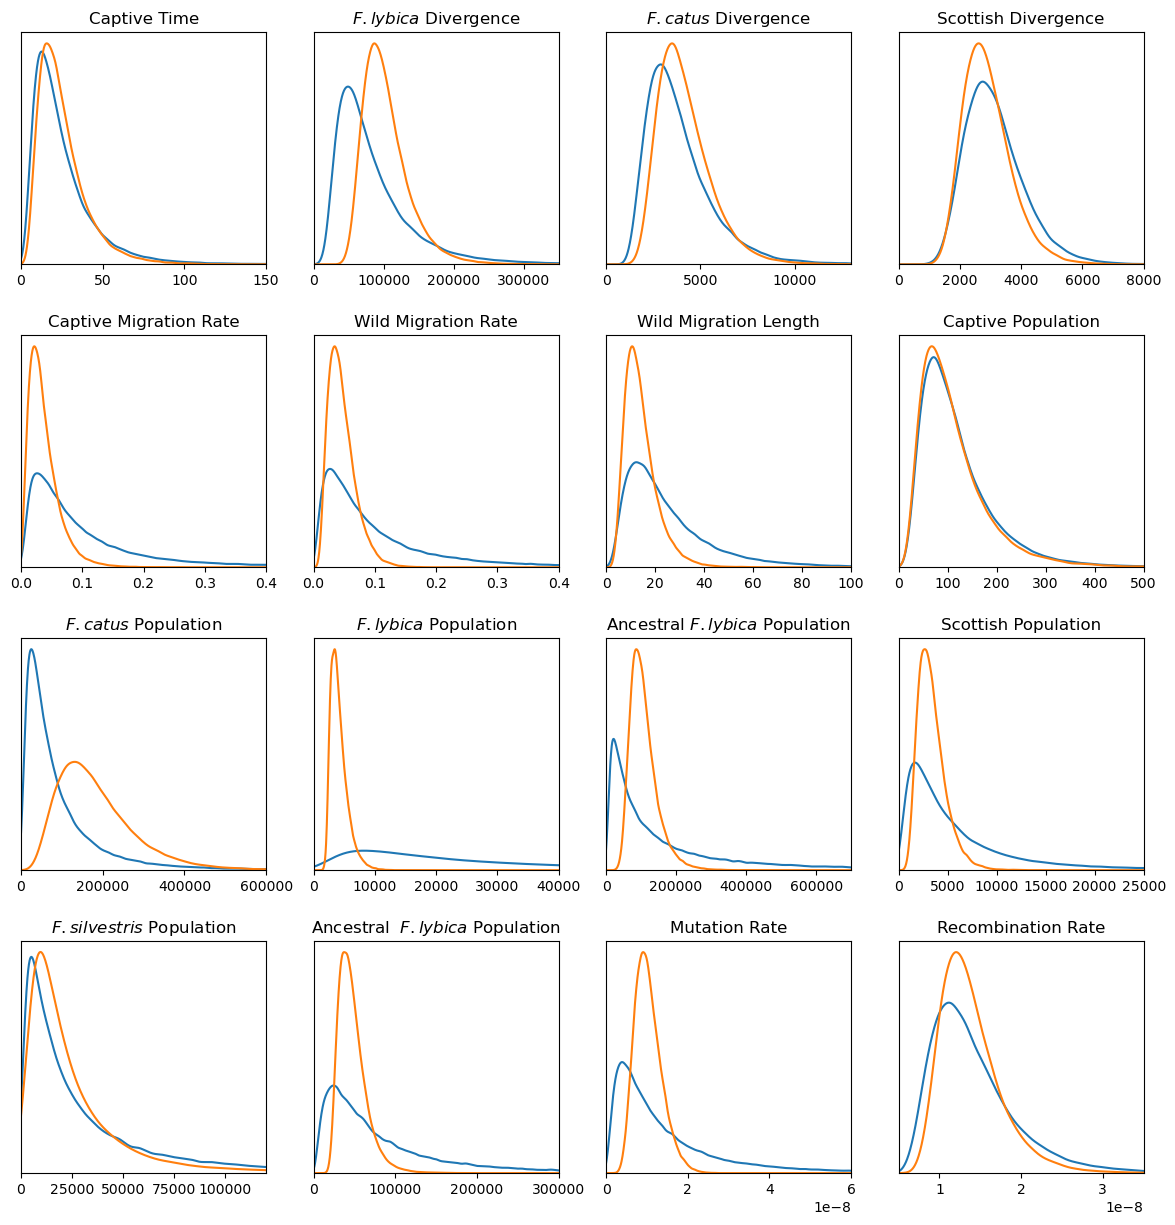

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Set up the figure and axes for the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout(w_pad=0, h_pad=3.0)  # Adjust padding between plots

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop over each dataset and each axis to plot the KDE
for i, ax in enumerate(axes):
    # Compute Gaussian KDE
    kde1 = gaussian_kde(theta[i][0:99999], bw_method=params[i]["bw"][0])
    kde2 = gaussian_kde(theta2[0:99999,i], bw_method=params[i]["bw"][1])
    #kde3 = gaussian_kde(theta3[0:99999,9], bw_method=0.1)

    # Generate a smooth range of x-values
    x1_values = params[i]["range"]
    x2_values = params[i]["range"]
    #x3_values = np.linspace(0, 40000, 1000)
    # Get corresponding y-values for the KDE
    y1_values = kde1(x1_values)
    y2_values = kde2(x2_values)
    #y3_values = kde3(x3_values)
    # Plot the smooth KDE curve
    ax.plot(x1_values, y1_values, label="Prior")
    ax.plot(x2_values, y2_values, label="Round 2")
    #ax.plot(x3_values, y3_values, label="Round 3")
    # format axes
    ax.set_title(names[i])
    ax.set_xlim(params[i]["lims"])
    ax.set_ylim(bottom=0)
    ax.set_yticks([])
    
# Show the plot
plt.show()